In [18]:
# HW2
# Evan Julius
# G939M582

# Note: Please import the following modules
import time # import this module to allow for .time() to be used
import matplotlib.pyplot as plt # import pyplot from matplotlib
import numpy as np # numpy allows for easy data manipulation, and .arange()

## Question 1:

Let *f(n)* and *g(n)* be asymptotically nonegative functions. Using the basic definition of $\Theta$-notation, prove that **max**(*f(n)*, *g(n)*) = $\Theta$(*f(n)* + *g(n)*) 

Let *h(n)* = f(n) + g(n)

The boundaries of $\Theta$ is considered:
- 0 $\leq c1*h(n) \leq max(f, g) \leq c2 * h(n)$ when $ n \geq n0$

The boundaries of the following functions are:
- f(n) $\leq$ **max**(*f(n)*, *g(n)*)
- g(n) $\leq$ **max**(*f(n)*, *g(n)*)

By adding both the functions together, the following can be written:

- f(n) + g(n) $\leq$ 2 * max(f(n), g(n)) 

or,

- $\frac{(fn + gn)}{2} \leq$ max(*f(n)*, *g(n)*)


--- 

## Question 2



Use Big Oh's definition to prove that fn = n\*n + 10n + 101 = O(n\*n)


By reason, it can be notice that both equations have a leading term of $n^{2}$. With the addition of the terms, 10n, and 101, it can be reasoning that the overall value will be greater than $n^{2}$. Therefore, it can be concluded that the upper bound of the function has a growth rate of O($n^{2}$).

---

By using plotly; the difference can be seen:

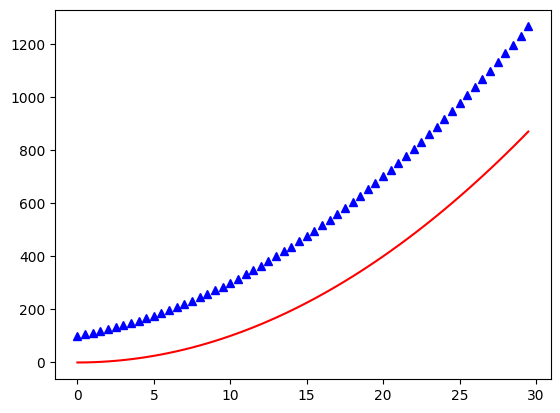

In [1]:
t=np.arange(0.,30.,0.5)

# evenly sampled time a
plt.plot(t,t*t,"r", t, t*t+10*t+101, 'b^')
plt.show()

---

## Question 3: 

Improve the following function so the time complecity will be reduced from O($n^{3}$) to O($n^{2}$)

First, observe the following function, and notice the summation in the if-condition. It creates another running time of O(n). It is within a nested loop of O(n). The outer loop is also a linear loop of O(n) time. This creates a running time algorithm of O(n\*n\*n)

In [20]:
start = time.time()
def naiveMaxSubarray(arr:list)-> list:
    currentMax = arr[0]
    i_max, j_max = 0,0
    
    for i in range(len(arr)):
        for j in range(i,len(arr)):    
            if sum(arr[i:j])> currentMax:
                currentMax = sum(arr[i:j])
                i_max, j_max = i, j
                
    return [i_max, j_max-1]
end = time.time()

arr = [13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
naiveRunningTime = end - start
naiveMaxSubarray(arr)
print("With a total running time of: ", naiveRunningTime, " seconds")

With a total running time of:  0.00023174285888671875  seconds


---

### Solution:

To note.. I wanted to figure this problem out. After Quiz 1 I felt inspired to answer this correctly.(?) I used OpenAI to help answer the following questions pertaining to this question.

**Q**: What does O($n^{3}$) mean?

*A*: (Paraphrased..) It means that its running time grows as the cube of the size of the input. This meant that if the input size *n* of the input grows *n* to 2*n*, where the number of operations required by the algorithm will increase by a factor of 8. And, is commonly involves nested loops, where each iteration of the *inner-most* loop takes a constant of O(n) time, or *linear-time*

**Q**: What wouId a quick example of an algorithm with time complexity of O(n^3)?

*A*: An example would have three nested loops, each iterating *n* times. The number of operations performed by this will grow as the cube of *n*. Thus, for when *n = 10*, the algorithm performs 

**Q**: Ways to reduce a running time of an algorithm?

*A*: Optimization, Parallel Processing, Pre-Processing, Specialized Tools

---

As a way of accompanying the parallelism of the Divide and Conquer algorithm, the summation of the maxSubarray can be moved outside of the nested loops to reduce the amount of time the total summation must be calculated. 

By introducing an index for the '*rolling*'-sum of the array, the running time can be reduced from O($n^{3}$) to O($n^{2}$).

---



In [19]:
start = time.time()
def newMaxSubarray(arr:list)-> list:
    currentMax = arr[0]
    i_max, j_max = 0,0
    rolling_sum = 0
    
    for i in range(len(arr)):
        rolling_sum = 0
        for j in range(i,len(arr)): 
            
            # A new number is added to the rolling sum
            rolling_sum += arr[j]
            
            # the new rolling sum is compared to the currentMax
            if rolling_sum > currentMax:
                
                # if larger, the currentMax is valued by new summation
                currentMax = rolling_sum
                i_max, j_max = i, j
                
    return [i_max, j_max-1]
end = time.time()

arr = [13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
newRunningTime = end - start
newMaxSubarray(arr)
print("With a total running time of: ", newRunningTime, " seconds")

With a total running time of:  0.0001919269561767578  seconds
